### Comparing an equiweighted portfolio of the top 5 S&P 500 companies against the market.
#### Portfolio components: MSFT, AAPL, AMZN, FB, GOOGL - against ^GSPC

In [1]:
# Step one is to download the required packages

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

### Load stock and market index data from the yahoo finance API

In [3]:
tickers = ['MSFT', 'AAPL', 'AMZN', 'FB', 'GOOGL']
Data = pd.DataFrame()
for t in tickers:
    Data[t] = wb.DataReader(t, data_source='yahoo', start='2014-1-1')['Adj Close']

In [4]:
Data.tail()

,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2020-06-02,184.910004,323.339996,2472.409912,232.720001,1442.310059
2020-06-03,185.360001,325.119995,2478.399902,230.160004,1439.250000
2020-06-04,182.919998,322.320007,2460.600098,226.289993,1414.300049
2020-06-05,187.199997,331.500000,2483.000000,230.770004,1440.020020
2020-06-08,188.360001,333.459991,2524.060059,231.399994,1448.040039


### Portfolio price = assuming portfolio has one stock each of the companies mentioned above and the portfolio cost is S1+S2+S3+S4+S5

In [5]:
prices = Data.sum(axis=1)
prices.tail()

Date
2020-06-02    4655.689972
2020-06-03    4658.289902
2020-06-04    4606.430145
2020-06-05    4672.490021
2020-06-08    4725.320084
dtype: float64

In [6]:
port_prices = prices.to_frame() # to convert the series into dataframe

In [7]:
port_prices.columns = ['Portfolio Price']
port_prices.tail()

,Portfolio Price
Date,
2020-06-02,4655.689972
2020-06-03,4658.289902
2020-06-04,4606.430145
2020-06-05,4672.490021
2020-06-08,4725.320084


### Market Data

In [8]:
index = ['^GSPC']
market = pd.DataFrame()
for i in index:
    market[i] = wb.DataReader(i, data_source='yahoo', start='2014-1-1')['Adj Close']

In [9]:
market.head()

,^GSPC
Date,
2013-12-31,1848.359985
2014-01-02,1831.979980
2014-01-03,1831.369995
2014-01-06,1826.770020
2014-01-07,1837.880005


### Let's assign weights to the portfolio

In [10]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [11]:
# calculating returns
stock_returns_d = np.log(Data/Data.shift(1))
(stock_returns_d).head()

,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.006705,-0.014164,-0.002058,0.001097,-0.006795
2014-01-03,-0.006750,-0.022211,-0.003852,-0.002745,-0.007322
2014-01-06,-0.021359,0.005438,-0.007113,0.047253,0.011088
2014-01-07,0.007720,-0.007177,0.011116,0.012509,0.019095


In [12]:
daily_mean_returns = stock_returns_d.mean()
daily_mean_returns # these are percentage returns

MSFT     0.001085
AAPL     0.000949
AMZN     0.001140
FB       0.000891
GOOGL    0.000586
dtype: float64

In [13]:
mean_annual_returns = daily_mean_returns*250

In [14]:
mean_annual_returns*100 # to gain percentage returns

MSFT     27.127773
AAPL     23.722118
AMZN     28.492728
FB       22.285339
GOOGL    14.644769
dtype: float64

### Assigning stock weight

In [15]:
weighted_returns = np.dot(weights, mean_annual_returns) # multiplying matrices using the dot product
weighted_returns

0.23254545176422534

In [16]:
portfolio_annual_returns = weighted_returns*100
portfolio_annual_returns

23.254545176422532

In [17]:
print('The portfolio annual return is: ' + str(round(portfolio_annual_returns, 2)) + '%')

The portfolio annual return is: 23.25%


### Finding the annual market return

In [18]:
market_returns = np.log(market/market.shift(1))
market_returns.head()

,^GSPC
Date,
2013-12-31,NaN
2014-01-02,-0.008901
2014-01-03,-0.000333
2014-01-06,-0.002515
2014-01-07,0.006063


In [19]:
average_d_returns = market_returns.mean()
average_d_returns

^GSPC    0.000345
dtype: float64

In [20]:
average_a_returns = average_d_returns*250
average_a_returns

^GSPC    0.086307
dtype: float64

In [21]:
percentage_annual_returns = average_a_returns*100
percentage_annual_returns

^GSPC    8.630683
dtype: float64

In [54]:
print('The market annual return is: 8.63%')

The market annual return is: 8.63%


### Calculating daily portfolio returns

In [23]:
weighted_returns = (weights * stock_returns_d)
df_returns = weighted_returns.sum(axis = 1)

In [24]:
df_returns.tail()*100 # normalized

Date
2020-06-02    0.502878
2020-06-03   -0.056896
2020-06-04   -1.271063
2020-06-05    1.958007
2020-06-08    0.735079
dtype: float64

In [25]:
df_returns.mean()*100 # normalized daily returns average

0.09296076207562491

In [26]:
df_returns.std()*100 # daily

1.4673873405959004

## Plotting Portfolio Returns

<function matplotlib.pyplot.show(*args, **kw)>

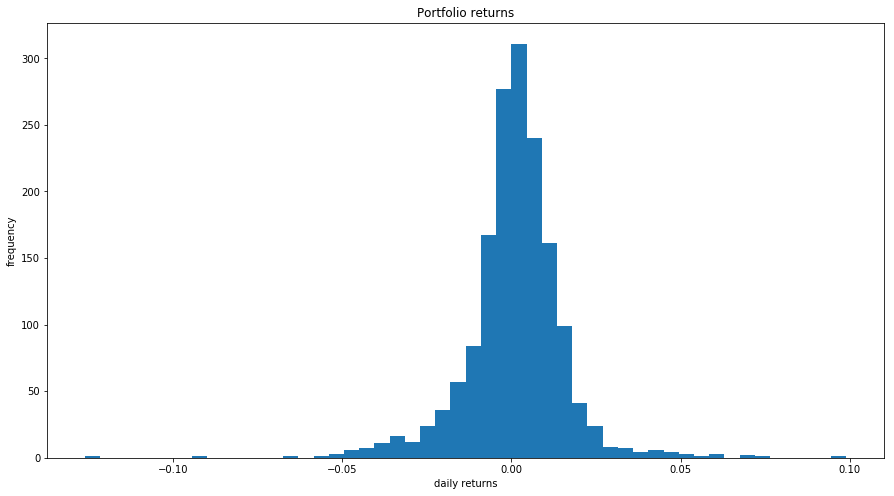

In [27]:
plt.figure(figsize=(15,8))
plt.hist(df_returns, bins = 50)
plt.title('Portfolio returns')
plt.ylabel('frequency')
plt.xlabel('daily returns')
plt.show

## Plotting general market returns

In [28]:
market_returns = (1 * market_returns)

In [29]:
m_returns = market_returns.sum(axis = 1)

<function matplotlib.pyplot.show(*args, **kw)>

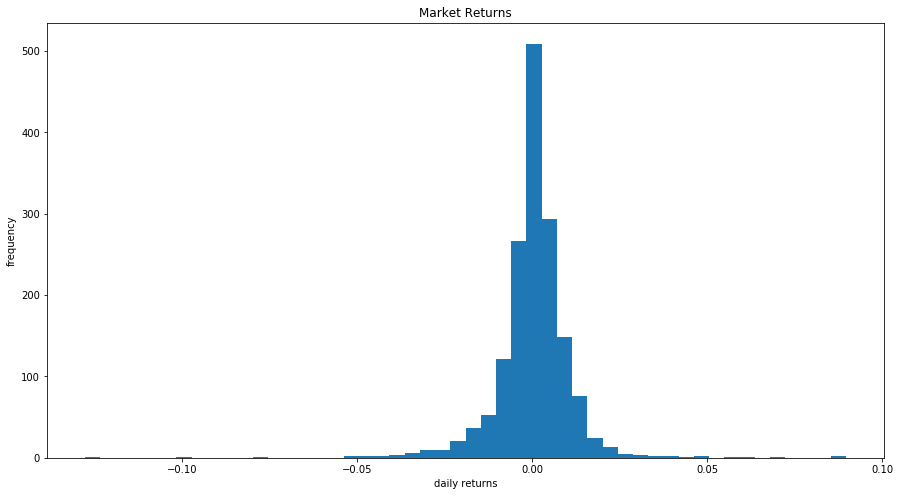

In [30]:
plt.figure(figsize=(15,8))
plt.hist(m_returns, bins = 50)
plt.title('Market Returns')
plt.ylabel('frequency')
plt.xlabel('daily returns')
plt.show

In [31]:
m_returns.tail()

Date
2020-06-02    0.008177
2020-06-03    0.013557
2020-06-04   -0.003374
2020-06-05    0.025874
2020-06-08    0.011970
dtype: float64

### Market Return and Volatility

In [32]:
m_returns.mean()

0.0003450142079912078

In [33]:
m_returns.mean()*100*250

8.625355199780195

In [34]:
m_returns.std()

0.011202563226978967

In [35]:
m_returns.std()*100*(250**0.5)

17.71280771464969

### Calculating Portfolio Beta Coefficient

In [36]:
# merging both series into a dataframe

returns = pd.concat([m_returns, df_returns], axis = 1)
returns.columns = ['Market', 'Portfolio']

In [37]:
returns.tail()

,Market,Portfolio
Date,,
2020-06-02,0.008177,0.005029
2020-06-03,0.013557,-0.000569
2020-06-04,-0.003374,-0.012711
2020-06-05,0.025874,0.019580
2020-06-08,0.011970,0.007351


In [38]:
returns.mean()

Market       0.000345
Portfolio    0.000930
dtype: float64

In [39]:
returns.cov()

,Market,Portfolio
Market,0.000125,0.000136
Portfolio,0.000136,0.000215


In [40]:
# annualising covariance
ann_cov = returns.cov()*250

In [41]:
cov_mp = ann_cov.iloc[0,1]
cov_mp

0.03409329401678845

In [42]:
market_var = (returns['Market'].var())*250
market_var

0.03137435571361535

In [43]:
beta = cov_mp/market_var
beta

1.0866611677381213

### Thus our portfolio has a Beta Coefficient slightly higher than 1.
### Now finally, let's forecast the next year's returns!
## MONTE CARLO SIMULATIONS!

In [44]:
port = returns['Portfolio']
port_returns = port.to_frame()

In [45]:
port_returns.tail()

,Portfolio
Date,
2020-06-02,0.005029
2020-06-03,-0.000569
2020-06-04,-0.012711
2020-06-05,0.019580
2020-06-08,0.007351


In [46]:
u = port_returns.mean()
u

Portfolio    0.00093
dtype: float64

In [47]:
v = port_returns.var()
v

Portfolio    0.000215
dtype: float64

In [48]:
drift = u - (0.5*v)
drift

Portfolio    0.000822
dtype: float64

In [49]:
drift.values

array([0.00082195])

In [50]:
std = port_returns.std()
std

Portfolio    0.014674
dtype: float64

In [51]:
std.values

array([0.01467387])

In [52]:
forecast_days = 365
iterations = 10 # meaning we want 10 prediction lists of 365 prices

In [53]:
daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(forecast_days,iterations)))
daily_returns

array([[0.99597118, 1.02609895, 1.00881114, ..., 0.99932419, 0.98170342,
        1.00459172],
       [0.99654235, 1.03261527, 0.99213938, ..., 0.99651763, 0.99435266,
        0.99792035],
       [1.01380144, 0.99909987, 0.984219  , ..., 1.01565105, 0.99363276,
        0.97399923],
       ...,
       [0.99547419, 1.01336547, 1.02057005, ..., 1.03453825, 1.00459978,
        1.00595584],
       [0.99687266, 1.00098547, 0.99575215, ..., 1.00783143, 1.00218287,
        0.992629  ],
       [0.98502486, 0.97916785, 1.00415232, ..., 1.0173413 , 0.98789437,
        0.98510879]])

### What we have above are 365x10 values of daily returns, that is, e**r, where r = drift x volatility

In [55]:
# setting a starting price or a previous price as P0
P0 = port_prices.iloc[-1]# assuming there is one stock each in the portfolio of the 5 comapnies bought at adjusted closing price
P0

Portfolio Price    4725.320084
Name: 2020-06-08 00:00:00, dtype: float64

In [56]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
price_list[0] = P0 # this demarcates the starting point for the series of predictions
for t in range(1, forecast_days):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [58]:
price_list

array([[ 4725.32008362,  4725.32008362,  4725.32008362, ...,
         4725.32008362,  4725.32008362,  4725.32008362],
       [ 4708.98156236,  4879.43766901,  4688.17615715, ...,
         4708.86475206,  4698.63460494,  4715.49305956],
       [ 4773.97230065,  4875.04553269,  4614.1920623 , ...,
         4782.56344589,  4668.71726935,  4592.88662344],
       ...,
       [11257.59060472,  5595.52992652,  4084.07510448, ...,
         5624.81012078,  9790.10856449, 10296.21840445],
       [11222.38428028,  5601.04418083,  4066.7265612 , ...,
         5668.8604054 ,  9811.47911825, 10220.32502756],
       [11054.32746735,  5484.36237159,  4083.61291831, ...,
         5767.16583091,  9692.70501013, 10068.13201097]])

<function matplotlib.pyplot.show(*args, **kw)>

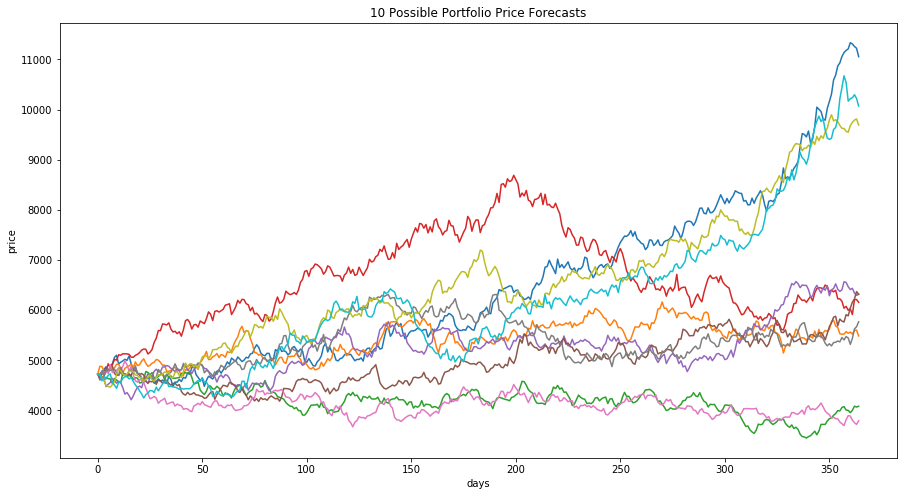

In [59]:
plt.figure(figsize=(15,8))
plt.plot(price_list)
plt.title('10 Possible Portfolio Price Forecasts')
plt.ylabel('price')
plt.xlabel('days')
plt.show

### So according to our predictive model, a portfolio of 5 stocks of 5 companies show the change as demonstrated in the graph above.

### Now let's forecast market growth

In [60]:
u_market = market_returns.mean()
u_market

^GSPC    0.000345
dtype: float64

In [61]:
v_market = market_returns.var()
v_market

^GSPC    0.000126
dtype: float64

In [62]:
market_drift = u_market - (0.5*v_market)
market_drift

^GSPC    0.000282
dtype: float64

In [63]:
market_drift.values

array([0.00028244])

In [64]:
market_stdev = market_returns.std()
market_stdev

^GSPC    0.011206
dtype: float64

In [65]:
market_stdev.values

array([0.01120602])

In [66]:
forecast = 365
iterations = 10

In [67]:
daily_market_returns = np.exp(market_drift.values + market_stdev.values*(norm.ppf(np.random.rand(forecast, iterations))))
daily_market_returns

array([[1.00852448, 1.00229019, 1.00101908, ..., 1.00063466, 1.00900856,
        1.00508345],
       [0.99956939, 1.00688685, 0.99896269, ..., 1.00681814, 1.01961245,
        1.00940976],
       [1.01029356, 1.00483949, 1.00414092, ..., 0.97893775, 1.0120915 ,
        1.02226317],
       ...,
       [0.98447042, 1.03220727, 1.00967659, ..., 1.0130433 , 1.00831888,
        0.99665823],
       [1.00236724, 0.99227534, 1.00484811, ..., 0.99625682, 1.00737904,
        1.00877673],
       [1.0193548 , 1.0001499 , 0.98669192, ..., 1.01060625, 1.00388996,
        1.00854292]])

### Marking initial price as M0

In [68]:
M0 = market.iloc[-1]
M0

^GSPC    3232.389893
Name: 2020-06-08 00:00:00, dtype: float64

In [69]:
# making an empty list to fill with forecasts
p_list = np.zeros_like(daily_market_returns)
p_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
# creating a for loop to fill in the list
p_list[0] = M0
for a in range(1, forecast):
    p_list[a] = p_list[a-1] * daily_market_returns[a]

In [71]:
p_list

array([[3232.38989258, 3232.38989258, 3232.38989258, ..., 3232.38989258,
        3232.38989258, 3232.38989258],
       [3230.99798998, 3254.65089291, 3229.03691696, ..., 3254.42878051,
        3295.78499386, 3262.80589371],
       [3264.25645775, 3270.40174339, 3242.40811367, ..., 3185.88318177,
        3335.63599419, 3335.44630702],
       ...,
       [2169.48159253, 4584.87006249, 3256.66847755, ..., 3828.91420181,
        3853.33505595, 4591.06117296],
       [2174.61727934, 4549.45349716, 3272.45715147, ..., 3814.58188159,
        3881.76896991, 4631.35569354],
       [2216.7065565 , 4550.1354384 , 3228.90703261, ..., 3855.04028234,
        3896.86890259, 4670.92100298]])

<function matplotlib.pyplot.show(*args, **kw)>

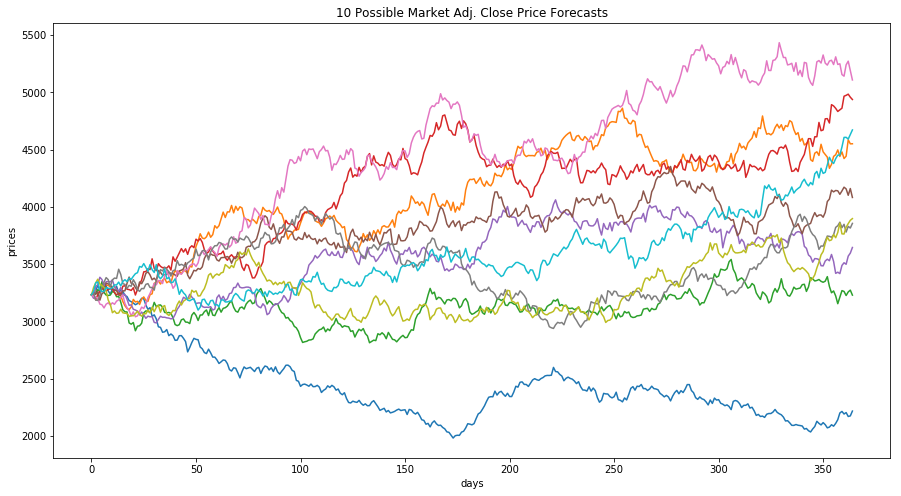

In [72]:
# let's plot our work
plt.figure(figsize=(15,8))
plt.plot(p_list)
plt.title('10 Possible Market Adj. Close Price Forecasts')
plt.ylabel('prices')
plt.xlabel('days')
plt.show

### To conclude, our portfolio is forecasted to perform better than the market on average. Whie the maximum gains reported for the S&P 500 is 5250 dollars (approx) - our portfolio's predicted maximum is 7500 dollars (approx.) 

### Thus, in a year, we can on average expect the portfolio price to be 5150 dollars (a general arithmetic average of the 10 possible outcomes) where the current price is almost 4700 dollars

### However, with the market on average, the current price is 3210 dollars and the average possible price in 365 days is 3550 dollars (approx.)